In [21]:
# !git clone https://huggingface.co/spaces/Vikas01/gender-age-detection

In [5]:
!pip install tensorflow keras opencv-python pillow matplotlib


In [6]:
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files


In [8]:
import os
os.chdir('/content/gender-age-detection')

## Geneder Classification

In [20]:
gender_model = load_model('gender_model_pretrained.h5')

In [10]:
gender_ranges = ['male', 'female']


In [11]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError("Haar cascade file not found")


In [12]:
image_path = 'lenna.jpg'
image = Image.open(image_path).convert("RGB")
image = np.array(image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)


In [18]:
i = 0

for (x, y, w, h) in faces:
    i += 1
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

    img_gray = gray[y:y+h, x:x+w]


    # Gender
    gender_img = cv2.resize(img_gray, (100, 100))
    gender_input = np.expand_dims(gender_img, axis=0)
    gender_input = np.expand_dims(gender_input, axis=-1)
    output_gender = gender_ranges[np.argmax(gender_model.predict(gender_input))]

    label = f"{output_gender}"

    cv2.putText(image, label, (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    print(f"Face {i}: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Face 1: female


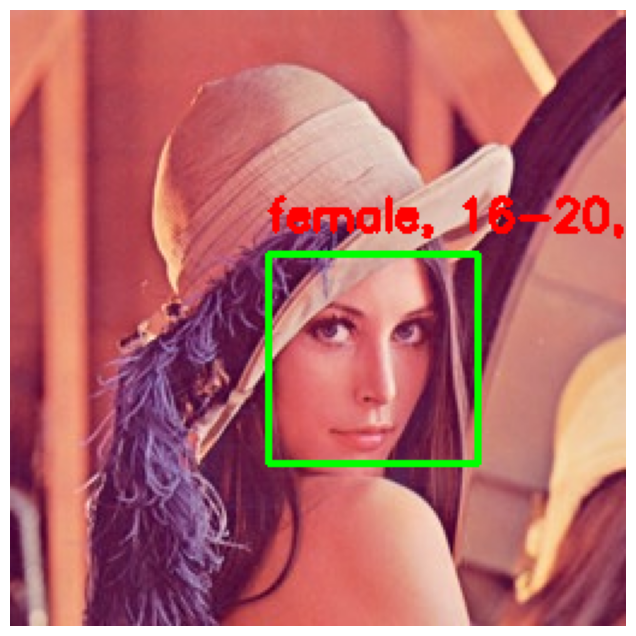

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.show()


## Age Prediction

In [22]:
age_model = load_model('age_model_pretrained.h5')


In [23]:
age_ranges = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30',
              '31-35','36-40','41-50','51-60','61-70','71-80','81-90']

In [24]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError("Haar cascade file not found")


In [25]:
image_path = 'lenna.jpg'
image = Image.open(image_path).convert("RGB")
image = np.array(image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)


In [26]:
i = 0

for (x, y, w, h) in faces:
    i += 1
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

    img_gray = gray[y:y+h, x:x+w]

    # Age
    age_img = cv2.resize(img_gray, (200, 200))
    age_input = age_img.reshape(-1, 200, 200, 1)
    output_age = age_ranges[np.argmax(age_model.predict(age_input))]

    label = f"{output_age}"
    cv2.putText(image, label, (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    print(f"Face {i}: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
Face 1: 16-20


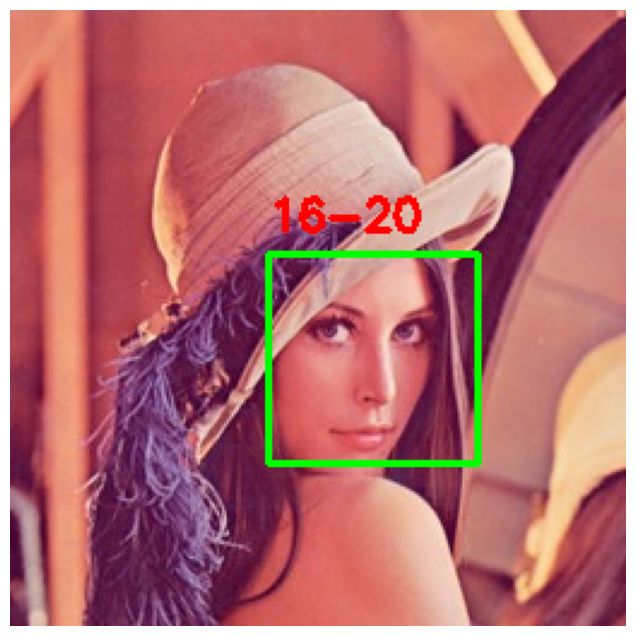

In [27]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.show()


## Emotion Recognition

In [28]:
emotion_model = load_model('emotion_model_pretrained.h5')


In [29]:
emotion_ranges = ['positive','negative','neutral']


In [30]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.empty():
    raise IOError("Haar cascade file not found")


In [31]:
image_path = 'lenna.jpg'
image = Image.open(image_path).convert("RGB")
image = np.array(image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)


In [32]:
i = 0

for (x, y, w, h) in faces:
    i += 1
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

    img_gray = gray[y:y+h, x:x+w]

    # Emotion
    emotion_img = cv2.resize(img_gray, (48, 48))
    emotion_input = np.expand_dims(emotion_img, axis=0)
    emotion_input = np.expand_dims(emotion_input, axis=-1)
    output_emotion = emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]


    label = f"{output_emotion}"
    cv2.putText(image, label, (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    print(f"Face {i}: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Face 1: negative


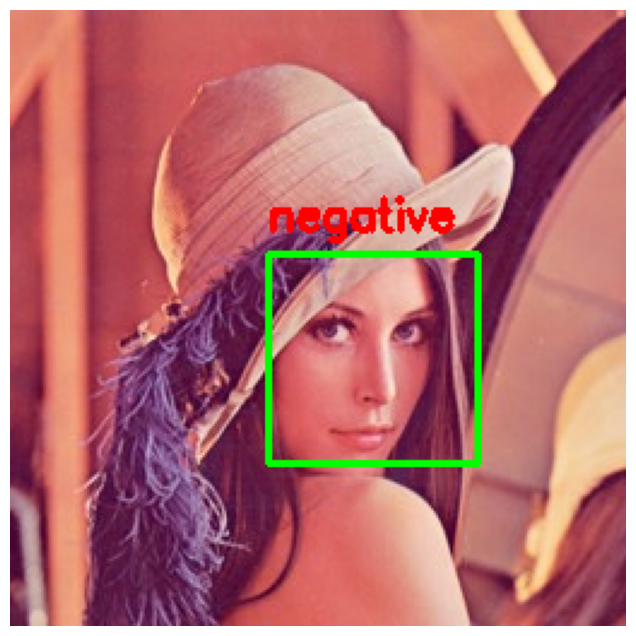

In [33]:
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.show()
